In [1]:
using LinearAlgebra
using Statistics
using SparseArrays
using MLDatasets
using PyPlot

## Test of Johnson-Lindenstrauss transform

In [2]:
d = 100000;
n = 100;

Xs = randn(d,n); # the dataset

In [3]:
epsilon = 0.1;
D = Int64(ceil(8 * log(n) / epsilon^2))

3685

In [4]:
A = randn(D, d) / sqrt(D);

In [5]:
# let's loook at this for a single example
norm(Xs[:,1] - Xs[:,2])

447.3594790493648

In [6]:
norm(A*Xs[:,1] - A*Xs[:,2])

453.60422837944606

In [7]:
norm(A*Xs[:,1] - A*Xs[:,2]) / norm(Xs[:,1] - Xs[:,2])

1.0139591304589126

In [8]:
AXs = A*Xs;

In [9]:
# over the whole dataset
extrema((i == j) ? 1.0 : norm(AXs[:,i] - AXs[:,j]) / norm(Xs[:,i] - Xs[:,j]) for i = 1:n, j = 1:n)   

(0.9519405550668073, 1.046375370822268)

In [10]:
# how much did we decrease the dimension?
D/d

0.03685

## Principal Component Analysis

In [11]:
n = 60000;
d = 28*28;

In [12]:
train_x, train_y = MNIST.traindata();

In [13]:
train_x = Float64.(reshape(train_x, (d, n)));

In [14]:
train_x_mean = mean(train_x; dims=2);

In [15]:
train_x_minus_mean = train_x .- train_x_mean;

$$\Sigma = \frac{1}{n} \sum_{i=1}^n \left( x_i - \frac{1}{n} \sum_{j=1}^n x_j \right) \left( x_i - \frac{1}{n} \sum_{j=1}^n x_j \right)^T$$

In [16]:
Sigma = (train_x_minus_mean * train_x_minus_mean')/n;

In [17]:
# find the eigendecomposition of Sigma
ESigma = eigen(Sigma; sortby = (x -> -x))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
784-element Array{Float64,1}:
  5.116787728342092
  3.7413284788648067
  3.2526542396844844
  2.8415733372665466
  2.5670749588127744
  2.273625491620609
  1.7251262295281955
  1.5205348976536206
  1.4562809808876922
  1.2427293764173304
  1.1120709732036005
  1.0666227659356209
  0.9046657547344794
  ⋮
 -4.341596436079342e-19
 -7.816133441131003e-19
 -8.328205317261318e-19
 -9.06846445474923e-19
 -2.7674683969166128e-18
 -7.155496110387914e-18
 -1.057007120922721e-17
 -2.366763579350205e-17
 -4.458784081324597e-17
 -6.16504989725162e-17
 -6.378346028260054e-17
 -9.992685906775396e-17
vectors:
784×784 Array{Float64,2}:
  0.0         0.0          0.0          …   0.0           0.0
  0.0         0.0          0.0              0.0           0.0
  0.0         0.0          0.0              0.0           0.0
  0.0         0.0          0.0              0.0           0.0
  0.0         0.0          0.0              0.0           0.

In [18]:
# largest eigenvalue
ESigma.values[1]

5.116787728342092

In [19]:
# corresponding eigenvector
ESigma.vectors[:, 1]

784-element Array{Float64,1}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
 -1.1302299848127289e-6
  ⋮
 -8.768996662290797e-5
 -4.596197162656801e-5
 -1.2747685973350732e-5
  1.7252770690812103e-5
  5.512661031686905e-6
 -2.593635886755097e-7
 -4.952733260038533e-7
  1.3784202612423542e-7
  0.0
  0.0
  0.0
  0.0

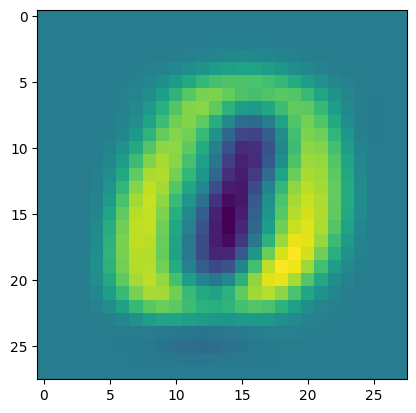

In [20]:
imshow(reshape(ESigma.vectors[:, 1], (28,28))');

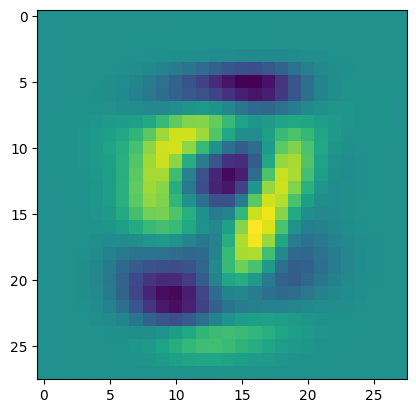

In [21]:
imshow(reshape(ESigma.vectors[:, 2], (28,28))');

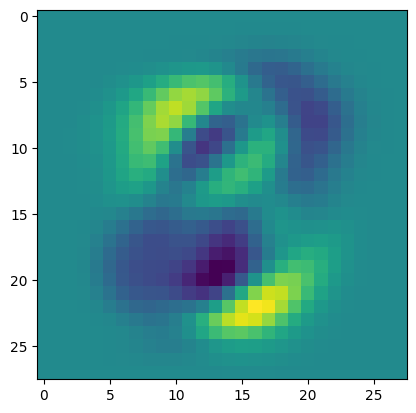

In [22]:
imshow(reshape(ESigma.vectors[:, 3], (28,28))');

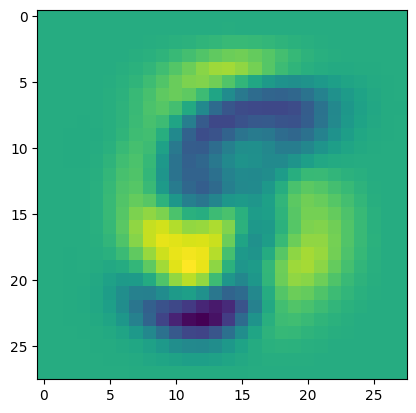

In [23]:
imshow(reshape(ESigma.vectors[:, 4], (28,28))');

In [24]:
imshow(reshape(ESigma.vec
tors[:, 5], (28,28))');

LoadError: syntax: missing comma or ) in argument list

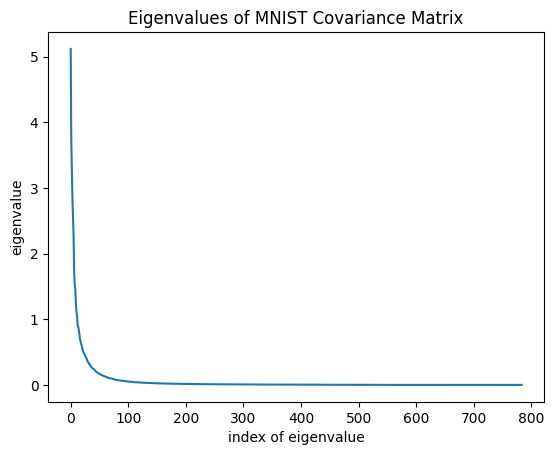

In [25]:
plot(ESigma.values)
ylabel("eigenvalue")
xlabel("index of eigenvalue")
title("Eigenvalues of MNIST Covariance Matrix");

PCA can represent objects in low dimension without losing information.

In [26]:
D = 5;

In [27]:
A = ESigma.vectors[:, 1:D]';

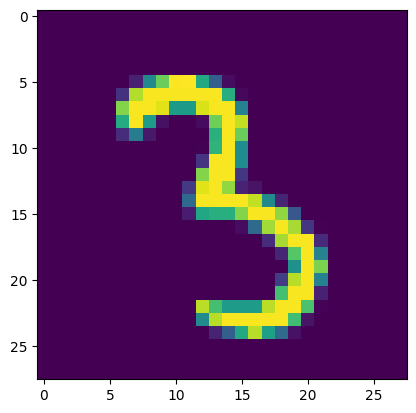

In [28]:
# original image
i = 1337;
imshow(reshape(train_x[:,i], (28,28))');

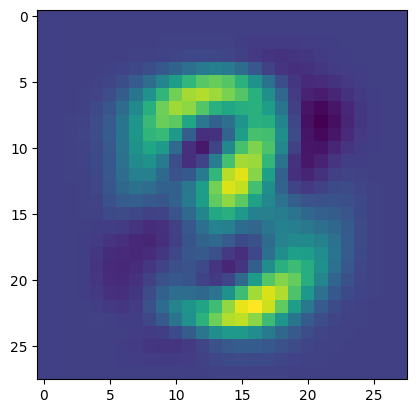

In [29]:
# dimension-reduced image
x_dr = A * train_x_minus_mean[:,i]
x_recovered = A' * x_dr + train_x_mean;

# original image
imshow(reshape(x_recovered, (28,28))');

Still enough to classify the image!

In [30]:
Matrix(X)

LoadError: UndefVarError: X not defined

## Sparsity

In [31]:
n = 4096;
X = sprand(n,n,0.1);
Y = sprand(n,n,0.1);

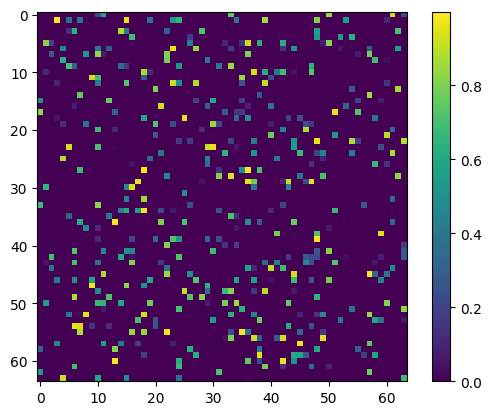

In [32]:
# visualize part of it
imshow(X[1:64,1:64]);
colorbar();

In [33]:
# get the size of X in bytes
Base.summarysize(X)

26896696

In [34]:
# type of X
typeof(X)

SparseMatrixCSC{Float64,Int64}

In [35]:
Xdense = Matrix(X);
Ydense = Matrix(Y);
typeof(Xdense)

Array{Float64,2}

In [36]:
Base.summarysize(Xdense)

134217768

In [37]:
# what's the ratio?
Base.summarysize(X) / Base.summarysize(Xdense)

0.20039594161631416

In [38]:
# what fraction of X's entries are nonzero?
nnz(X) / length(X)

0.10007530450820923

Why are these numbers not equal?

In [39]:
@time X * Y;

  1.312289 seconds (110.34 k allocations: 287.229 MiB, 0.31% gc time)


In [40]:
dense_mmpy_time = @elapsed Xdense * Ydense

1.174083337

What happened here???

In [41]:
# make X and Y less dense
Xsparser = sprand(n,n,0.01);
Ysparser = sprand(n,n,0.01);
@time Xsparser * Ysparser;

  0.121884 seconds (8 allocations: 94.578 MiB)


In [42]:
densities = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3];
sparse_mm_times = Float64[];
for d in densities
    Xsparse = sprand(n,n,d);
    Ysparse = sprand(n,n,d);
    push!(sparse_mm_times, @elapsed(Xsparse * Ysparse));
end

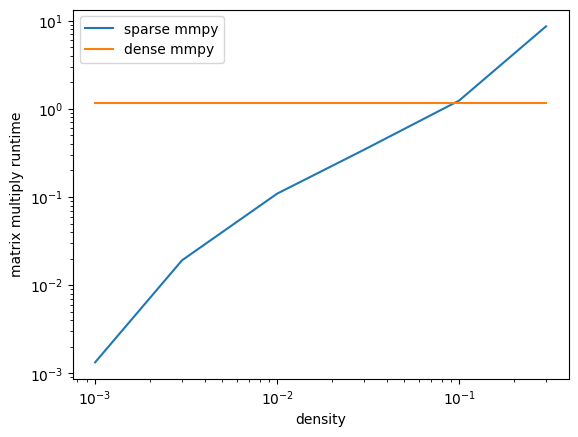

In [43]:
loglog(densities, sparse_mm_times; label="sparse mmpy");
loglog(densities, densities * 0 .+ dense_mmpy_time; label="dense mmpy");
xlabel("density");
ylabel("matrix multiply runtime");
legend();

In [46]:
spv = X[:,1]

4096-element SparseVector{Float64,Int64} with 427 stored entries:
  [16  ]  =  0.494497
  [18  ]  =  0.826087
  [34  ]  =  0.687849
  [59  ]  =  0.318373
  [63  ]  =  0.543537
  [73  ]  =  0.460325
  [75  ]  =  0.0852525
  [90  ]  =  0.141923
  [108 ]  =  0.0701148
  [116 ]  =  0.994332
          ⋮
  [4029]  =  0.570289
  [4035]  =  0.54624
  [4040]  =  0.202171
  [4042]  =  0.403688
  [4062]  =  0.420507
  [4066]  =  0.538902
  [4068]  =  0.265724
  [4072]  =  0.191174
  [4080]  =  0.67434
  [4084]  =  0.384076
  [4089]  =  0.188717

In [47]:
spv.n

4096

In [48]:
spv.nzind

427-element Array{Int64,1}:
   16
   18
   34
   59
   63
   73
   75
   90
  108
  116
  125
  127
  134
    ⋮
 4021
 4029
 4035
 4040
 4042
 4062
 4066
 4068
 4072
 4080
 4084
 4089

In [49]:
spv.nzval

427-element Array{Float64,1}:
 0.4944967485040994
 0.8260867791524058
 0.6878492561841358
 0.31837265760532185
 0.5435373410214652
 0.4603252124070474
 0.08525252863099708
 0.14192308123381947
 0.07011482669433211
 0.994332364738097
 0.07054927165346192
 0.3335951909204913
 0.9303865975954675
 ⋮
 0.2442214611309792
 0.5702885838128535
 0.5462397434084996
 0.20217057750630207
 0.40368809673279826
 0.420507447700027
 0.5389015609303036
 0.2657240323430008
 0.19117367805893304
 0.674340219210197
 0.3840757164610593
 0.18871747643515846